In [1]:
import LogisticRegression
import PCA
import GaussianClassifierTiedCov
import GMM
import numpy as np
import utils


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
prior=0.5
D, L = utils.load('Train.txt')
ZD, mean, standardDeviation = utils.ZNormalization(D)
ZD7=PCA.PCA(ZD, L, 7)
DT, LT = utils.load('Test.txt')
ZDT, mean, standardDeviation = utils.ZNormalization(DT)
ZDT7=PCA.PCA(ZDT, LT, 7)
gc = GaussianClassifierTiedCov.GaussianClassifierTiedCov()
lr = LogisticRegression.LogisticRegression()
lambd = 1e-4
numberOfSplitToPerform = 3
gmm = GMM.GMM()

In [6]:
print("Start Tied-Cov on z normalized features PCA m=7")
FPR = []
TPR = []
gc.train(ZD7, L)
un_scores = gc.predictAndGetScores(ZDT7)
scores = utils.calibrateScores(un_scores, LT, 1e-4).flatten()
print (scores.shape)
sortedScores=np.sort(scores)
for t in sortedScores:
    m = utils.computeOptimalBayesDecisionBinaryTaskTHRESHOLD(
        prior, 1, 1, scores, LT, t)
    FPRtemp, TPRtemp = utils.computeFPRTPR(prior, 1, 1, m)
    FPR.append(FPRtemp)
    TPR.append(TPRtemp)
print("End Tied-Cov")

Start Tied-Cov on z normalized features PCA m=7
(8969,)
End Tied-Cov


In [7]:
print("Start Linear Logistic Regression on z normalized features PCA m=7 with lambda=10^(-4) and pi_T=0.5")
FPR1 = []
TPR1 = []
lr.train(ZD7, L, lambd, prior)
scores = lr.predictAndGetScores(ZDT7)
scores = utils.calibrateScores(scores, LT, 1e-4).flatten()
sortedScores=np.sort(scores)
for t in sortedScores:
    m = utils.computeOptimalBayesDecisionBinaryTaskTHRESHOLD(
        prior, 1, 1, scores, LT, t)
    FPRtemp, TPRtemp = utils.computeFPRTPR(prior, 1, 1, m)
    FPR1.append(FPRtemp)
    TPR1.append(TPRtemp)
print("End logistic regression")

Start Linear Logistic Regression on z normalized features PCA m=7 with lambda=10^(-4) and pi_T=0.5
End logistic regression


In [8]:
print("Start Full-Cov 8 GMM components on z normalized features")
FPR2 = []
TPR2 = []
gmm.train(ZD, L, numberOfSplitToPerform)
scores = gmm.predictAndGetScores(DT)
scores = utils.calibrateScores(scores, LT, 1e-4).flatten()
sortedScores=np.sort(scores)
for t in sortedScores:
    m = utils.computeOptimalBayesDecisionBinaryTaskTHRESHOLD(
        prior, 1, 1, scores, LT, t)
    FPRtemp, TPRtemp = utils.computeFPRTPR(prior, 1, 1, m)
    FPR2.append(FPRtemp)
    TPR2.append(TPRtemp)
print("End GMM")

Start Full-Cov 8 GMM components on z normalized features
End GMM


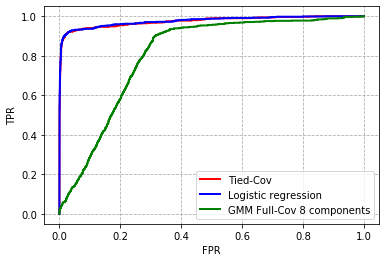

In [9]:
utils.plotROC(FPR, TPR, FPR1, TPR1, FPR2, TPR2)